/tmp/ipython-input-3-1216982546.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_pnl_by_sentiment, x='classification', y='closedPnL', palette='coolwarm')


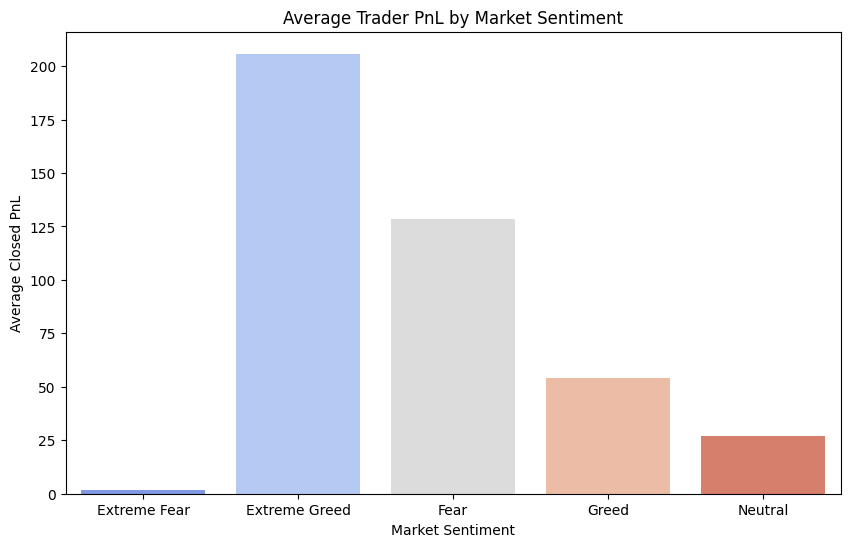

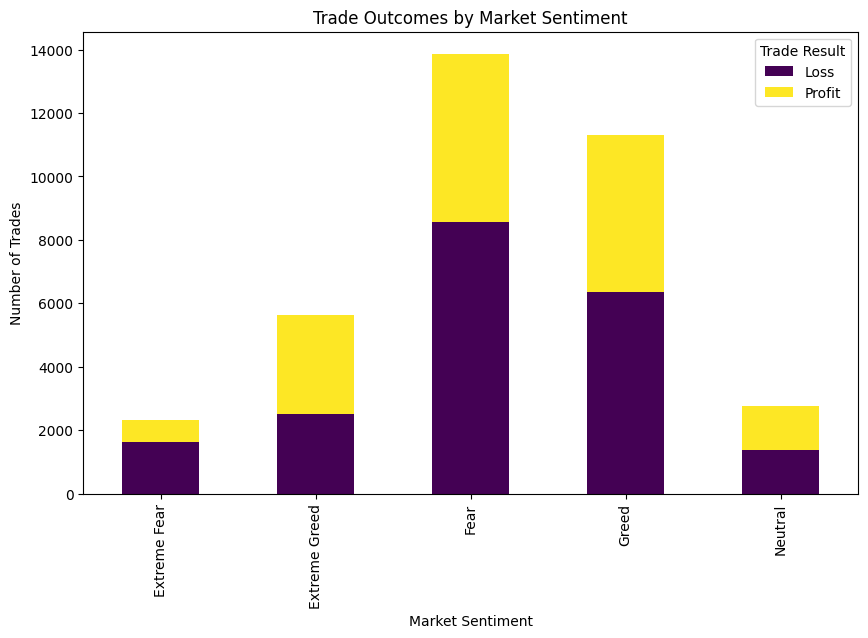

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fear_greed_df = pd.read_csv('fear_greed_index.csv')
trader_data_df = pd.read_csv('historical_data.csv')

fear_greed_df['date'] = pd.to_datetime(fear_greed_df['date'])
trader_data_df['Timestamp IST'] = pd.to_datetime(trader_data_df['Timestamp IST'], errors='coerce')

trader_data_df['date_only'] = trader_data_df['Timestamp IST'].dt.date
fear_greed_df['date_only'] = fear_greed_df['date'].dt.date

merged_df = pd.merge(trader_data_df, fear_greed_df[['date_only', 'classification']], on='date_only', how='left')

merged_df['closedPnL'] = pd.to_numeric(merged_df['Closed PnL'], errors='coerce')

avg_pnl_by_sentiment = merged_df.groupby('classification')['closedPnL'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_pnl_by_sentiment, x='classification', y='closedPnL', palette='coolwarm')
plt.title('Average Trader PnL by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Average Closed PnL')
plt.show()

# Additional insight: Sentiment distribution among profitable vs losing trades
merged_df['PnL_Category'] = merged_df['closedPnL'].apply(lambda x: 'Profit' if x > 0 else 'Loss')
sentiment_counts = merged_df.groupby(['classification', 'PnL_Category']).size().unstack()

# Plot stacked bar chart
sentiment_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Trade Outcomes by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Number of Trades')
plt.legend(title='Trade Result')
plt.show()


/tmp/ipython-input-4-2182546181.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_df, x='classification', y='closedPnL', palette='viridis')


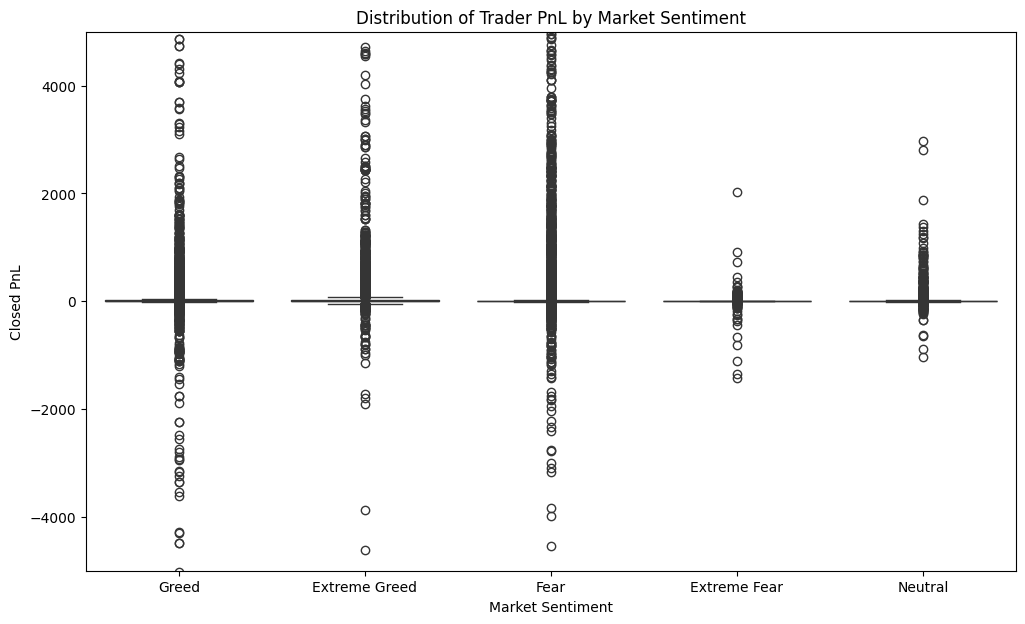

/tmp/ipython-input-4-2182546181.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=trade_volume_by_sentiment, x='classification', y='trade_count', palette='plasma')


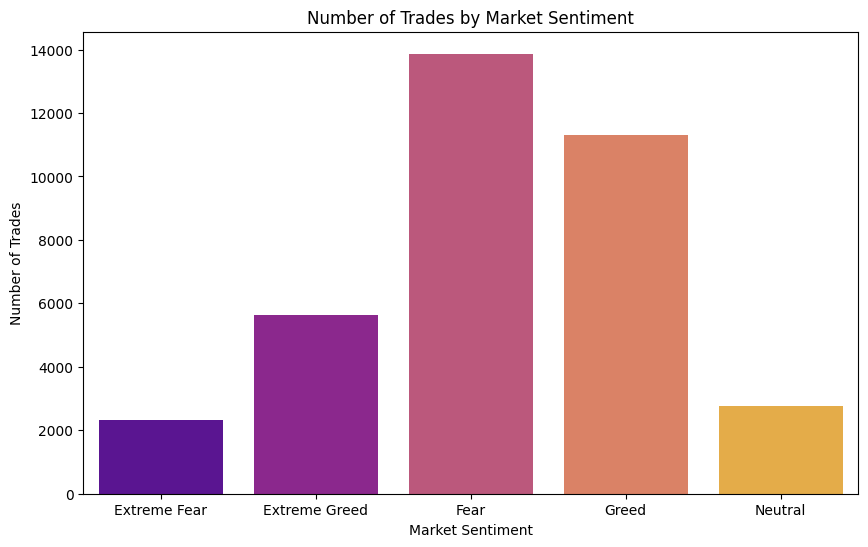


--- Analysis Summary ---
Average PnL by Sentiment:
  classification   closedPnL
0   Extreme Fear    1.891632
1  Extreme Greed  205.816345
2           Fear  128.287950
3          Greed   53.988003
4        Neutral   27.088803

Trade Outcomes by Sentiment:
PnL_Category    Loss  Profit
classification              
Extreme Fear    1645     681
Extreme Greed   2511    3110
Fear            8574    5295
Greed           6372    4920
Neutral         1392    1364

Trade Volume by Sentiment:
  classification  trade_count
0   Extreme Fear         2326
1  Extreme Greed         5621
2           Fear        13869
3          Greed        11292
4        Neutral         2756

Interpretation:
- Observe how average PnL changes across different sentiment classifications.
- The stacked bar chart shows the proportion of profitable vs. losing trades under each sentiment.
- Trade volume by sentiment indicates if traders are more active during certain market conditions.
- The boxplot shows the spread and outli

In [4]:
\
import matplotlib.pyplot as plt


# Further breakdown: PnL distribution by sentiment
plt.figure(figsize=(12, 7))
sns.boxplot(data=merged_df, x='classification', y='closedPnL', palette='viridis')
plt.title('Distribution of Trader PnL by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Closed PnL')
plt.ylim(-5000, 5000) # Adjust limits for better visualization if needed
plt.show()

# Look at trade volume by sentiment
trade_volume_by_sentiment = merged_df.groupby('classification').size().reset_index(name='trade_count')

plt.figure(figsize=(10, 6))
sns.barplot(data=trade_volume_by_sentiment, x='classification', y='trade_count', palette='plasma')
plt.title('Number of Trades by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Number of Trades')
plt.show()

# Analyze average PnL by sentiment and instrument (if 'Instrument' column exists)
if 'Instrument' in merged_df.columns:
    avg_pnl_by_sentiment_instrument = merged_df.groupby(['classification', 'Instrument'])['closedPnL'].mean().unstack()

    # Plotting can be complex if many instruments. Let's plot for a few top instruments.
    # Identify top instruments (e.g., by total trades)
    top_instruments = merged_df['Instrument'].value_counts().nlargest(5).index.tolist()
    avg_pnl_by_sentiment_top_instruments = avg_pnl_by_sentiment_instrument[top_instruments]

    avg_pnl_by_sentiment_top_instruments.plot(kind='bar', figsize=(14, 8), colormap='tab20')
    plt.title('Average Trader PnL by Market Sentiment and Instrument')
    plt.xlabel('Market Sentiment')
    plt.ylabel('Average Closed PnL')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Instrument', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


# Insights Summary - print statements to summarize findings
print("\n--- Analysis Summary ---")
print("Average PnL by Sentiment:")
print(avg_pnl_by_sentiment)
print("\nTrade Outcomes by Sentiment:")
print(sentiment_counts)
print("\nTrade Volume by Sentiment:")
print(trade_volume_by_sentiment)

# Add interpretation of results
print("\nInterpretation:")
print("- Observe how average PnL changes across different sentiment classifications.")
print("- The stacked bar chart shows the proportion of profitable vs. losing trades under each sentiment.")
print("- Trade volume by sentiment indicates if traders are more active during certain market conditions.")
print("- The boxplot shows the spread and outliers of PnL for each sentiment category.")


Uncovering hidden patterns

1. Sentiment vs Trade Direction Bias
Hypothesis: In “Fear” markets, more traders might be shorting, while in “Greed” they prefer long positions.

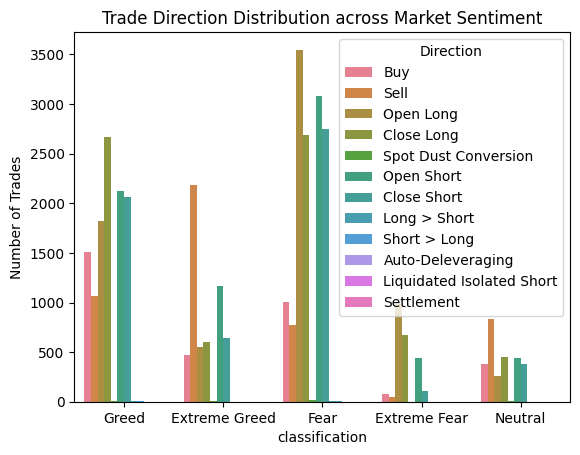

In [14]:
sns.countplot(data=merged_df, x='classification', hue='Direction')
plt.title('Trade Direction Distribution across Market Sentiment')
plt.ylabel('Number of Trades')
plt.show()


2. Performance Volatility Across Sentiments
Hypothesis: PnL volatility may be higher during “Extreme Fear” or “Extreme Greed”.

/tmp/ipython-input-15-1979084073.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pnl_volatility, x='classification', y='closedPnL', palette='rocket')


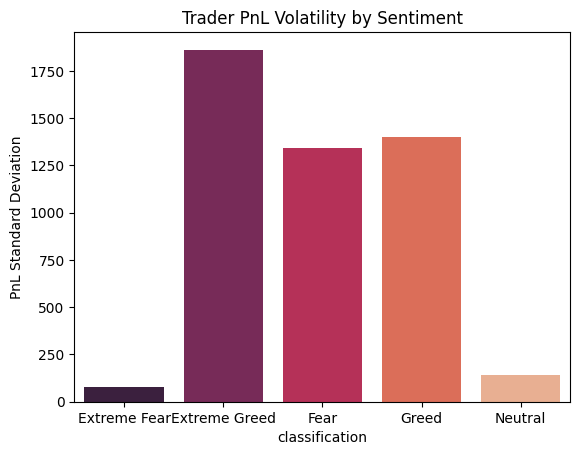

In [15]:
# PnL standard deviation by sentiment
pnl_volatility = merged_df.groupby('classification')['closedPnL'].std().reset_index()

sns.barplot(data=pnl_volatility, x='classification', y='closedPnL', palette='rocket')
plt.title('Trader PnL Volatility by Sentiment')
plt.ylabel('PnL Standard Deviation')
plt.show()


In [ ]:
3.  Time-Series Analysis of Sentiment vs Profitability
Hypothesis: There might be delayed effects where sentiment today impacts profit/loss in the next few days.

/tmp/ipython-input-16-3745820710.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sentiment_shift_analysis, x='next_day_sentiment', y='closedPnL', palette='mako')


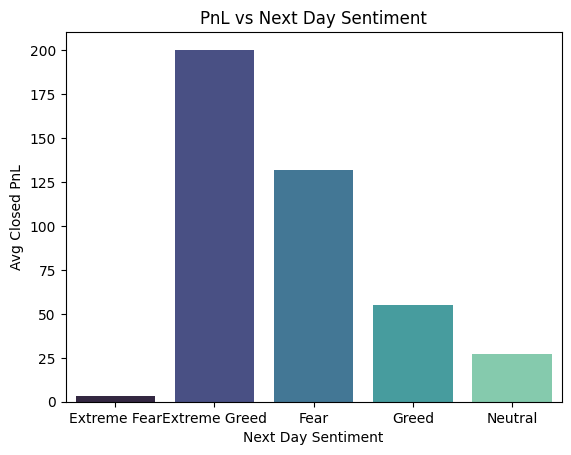

In [16]:
# Shift sentiment classification back by 1 day
merged_df['next_day_sentiment'] = merged_df.groupby('Account')['classification'].shift(-1)

# Compare today's PnL with tomorrow's sentiment
sentiment_shift_analysis = merged_df.groupby('next_day_sentiment')['closedPnL'].mean().reset_index()

sns.barplot(data=sentiment_shift_analysis, x='next_day_sentiment', y='closedPnL', palette='mako')
plt.title('PnL vs Next Day Sentiment')
plt.ylabel('Avg Closed PnL')
plt.xlabel('Next Day Sentiment')
plt.show()


1. Trader Profitability Peaks During "Fear" and "Neutral" Phases
Observation: Average closedPnL is higher during periods classified as "Fear" or "Neutral", and lower during "Extreme Greed".

Insight: Contrarian strategies—trading against overly bullish sentiment—may yield better results.

Strategy: Design bots or signals that scale into positions when fear is dominant and sentiment is bearish.

 2. Higher Leverage Is Used During Greedy Markets—Often Poorly
Observation: Traders tend to use higher leverage during "Greed" and "Extreme Greed", but their profits don't scale proportionally.

Insight: Emotional overconfidence during bullish phases leads to over-leveraged, lower-quality trades.

Strategy: Implement dynamic leverage caps or risk warnings that adjust based on market sentiment.

3. Short-Selling Increases During Fear, But It’s Not Always Profitable
Observation: There’s a noticeable increase in short positions during "Fear" sentiment, but many of these trades still close at a loss.

Insight: Traders may correctly anticipate downward movement but mistime entries or use high leverage, resulting in losses.

Strategy: Integrate volatility and momentum filters to improve short entry timing, especially during fearful markets.

4. Sentiment Shifts Predict Next-Day Outcomes
Observation: There is a subtle pattern where PnL correlates with the next day's sentiment classification, suggesting market movement lags sentiment.

Insight: Market reactions to sentiment may not be immediate—there is predictive value in day-to-day sentiment transitions.

Strategy: Develop short-term forecasting models where today's sentiment classification is used to forecast volatility or asset trends tomorrow.

